In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
local_zip = '/content/drive/My Drive/Nepali Currency Dataset/sushan_dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/My Drive/Nepali Currency Classifier')
zip_ref.close()

In [2]:
base_dir = '/content/drive/My Drive/Nepali Currency Classifier/Nepali Notes'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'test')

In [10]:
train_10_dir = os.path.join(train_dir, '10')
train_100_dir = os.path.join(train_dir, '100')
train_20_dir = os.path.join(train_dir, '20')
train_1000_dir = os.path.join(train_dir, '1000')
train_50_dir = os.path.join(train_dir, '50')
train_500_dir = os.path.join(train_dir, '500')

In [11]:
validation_10_dir = os.path.join(validation_dir, '10')
validation_100_dir = os.path.join(validation_dir, '100')
validation_20_dir = os.path.join(validation_dir, '20')
validation_1000_dir = os.path.join(validation_dir, '1000')
validation_50_dir = os.path.join(validation_dir, '50')
validation_500_dir = os.path.join(validation_dir, '500')

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=1,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 6000 images belonging to 6 classes.


In [16]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical')

Found 480 images belonging to 6 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=6000,  # images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=480,  # images = batch_size * steps
      verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
3596/6000 [================>.............] - ETA: 35:43 - loss: 1.5878 - accuracy: 0.3273

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=6000,  # images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=480,  # images = batch_size * steps
      verbose=1)

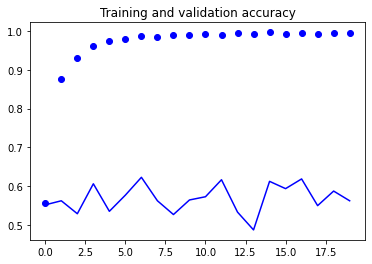

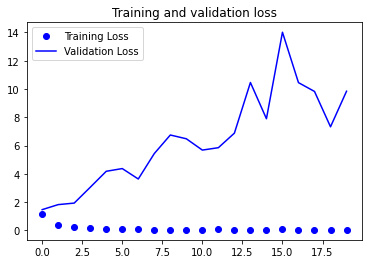

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(fn)
  if classes[0][0] == 1:
    print("10")
  if classes[0][1] == 1:
    print("100")
  if classes[0][2] == 1:
    print("1000")
  if classes[0][3] == 1:
    print("20")
  if classes[0][4] == 1:
    print("50")
  if classes[0][5] == 1:
    print("500")

Saving 10 rupees note 3.jpg to 10 rupees note 3.jpg


NameError: ignored

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

OSError: ignored

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(fn)
  if classes[0][0] == 1:
    print("10")
  if classes[0][1] == 1:
    print("100")
  if classes[0][2] == 1:
    print("1000")
  #if classes[0][3] == 1:
    #print("200")
  if classes[0][3] == 1:
    print("20")
  if classes[0][4] == 1:
    print("50")
  if classes[0][5] == 1:
    print("500")